Problem 4


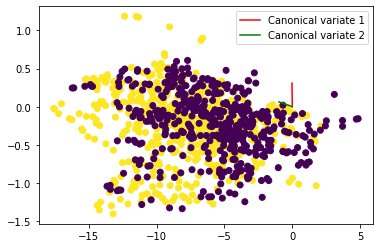

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = '/content/voweldata'

# Load the data
df = pd.read_csv(url, index_col=0)
X = df.values[:, :-1]
y = df.values[:, -1]

# Calculate class centroids
centroids = []
for c in np.unique(y):
    centroids.append(np.mean(X[y == c], axis=0))
centroids = np.array(centroids)

# Calculate the within-class covariance matrix
W = np.zeros((X.shape[1], X.shape[1]))
for c in np.unique(y):
    W += np.cov(X[y == c].T)
W /= len(np.unique(y))

# Calculate the between-class covariance matrix
B = np.cov(centroids.T)

# Calculate the optimal subspace
W_inv = np.linalg.inv(W)
M_star = np.dot(W_inv, centroids.T).T
B_star = np.cov(M_star.T)

# Perform eigen-decomposition of B_star
V_b_star, D_b_star, _ = np.linalg.svd(B_star)
V_b_star_sorted = V_b_star[:, np.argsort(-D_b_star)]

# Project the data onto the optimal subspace
Z = np.dot(X, W_inv).dot(V_b_star_sorted)

# Plot the data in the optimal subspace
v1, v2 = V_b_star_sorted[:, :2].T
plt.scatter(Z[:, 0], Z[:, 1], c=y)
plt.plot([0, v1[0]], [0, v1[1]], 'r', label='Canonical variate 1')
plt.plot([0, v2[0]], [0, v2[1]], 'g', label='Canonical variate 2')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import accuracy_score as asc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
urldata = '/content/voweldata'

df = pd.read_csv(urldata, index_col=0)
df.y = df.y - 1

# Split data into training and testing sets
features = [f'x.{i+1}' for i in range(10)]
X_train, X_test, y_train, y_test = train_test_split(df[features], df.y, test_size=0.2, random_state=42)

# Train a linear discriminant analysis (LDA) model on the training data
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the predictions
accu = asc(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", round(accu,3)*100,'%')

Accuracy score: 54.0 %
